In [22]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")


In [23]:
df=pd.read_csv(r"C:\Users\vasud\Downloads\archive\final_dataset.csv")
df

,Date,Month,Year,Holidays_Count,Days,PM2.5,PM10,NO2,SO2,CO,Ozone,AQI
0,1,1,2021,0,5,408.80,442.42,160.61,12.95,2.77,43.19,462
1,2,1,2021,0,6,404.04,561.95,52.85,5.18,2.60,16.43,482
2,3,1,2021,1,7,225.07,239.04,170.95,10.93,1.40,44.29,263
3,4,1,2021,0,1,89.55,132.08,153.98,10.42,1.01,49.19,207
4,5,1,2021,0,2,54.06,55.54,122.66,9.70,0.64,48.88,149
...,...,...,...,...,...,...,...,...,...,...,...,...
1456,27,12,2024,0,5,58.43,249.17,41.69,65.89,0.99,36.25,263
1457,28,12,2024,0,6,33.83,150.77,33.31,66.14,0.79,35.19,113
1458,29,12,2024,1,7,31.21,139.75,27.01,65.94,0.57,35.88,142
1459,30,12,2024,0,1,38.01,152.83,29.12,65.16,0.55,38.38,116


In [24]:
df.isnull().sum()

Date              0
Month             0
Year              0
Holidays_Count    0
Days              0
PM2.5             0
PM10              0
NO2               0
SO2               0
CO                0
Ozone             0
AQI               0
dtype: int64

<Axes: xlabel='SO2', ylabel='AQI'>

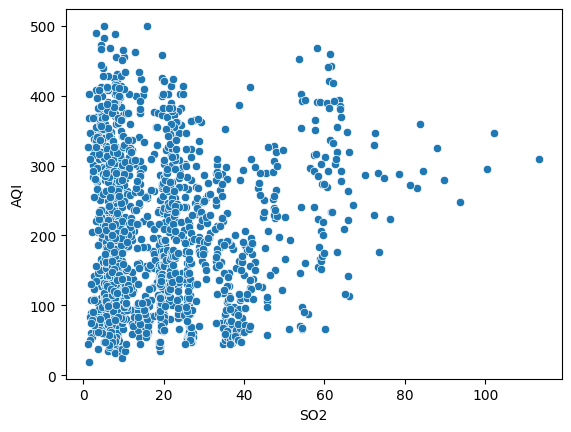

In [25]:
sns.scatterplot(x=df['SO2'],y=df['AQI'],data=df)

In [26]:
Q1= df['AQI'].quantile(0.25)
Q3=df['AQI'].quantile(0.75)
IQR=Q3-Q1
IQR

np.float64(176.0)

In [27]:
lower =Q1-1.5*IQR
upper =Q3+1.5*IQR

In [28]:
df.drop(df[df["AQI"]>upper].index ,inplace=True)
df.drop(df[df["AQI"]<lower].index, inplace=True)

In [29]:
df

,Date,Month,Year,Holidays_Count,Days,PM2.5,PM10,NO2,SO2,CO,Ozone,AQI
0,1,1,2021,0,5,408.80,442.42,160.61,12.95,2.77,43.19,462
1,2,1,2021,0,6,404.04,561.95,52.85,5.18,2.60,16.43,482
2,3,1,2021,1,7,225.07,239.04,170.95,10.93,1.40,44.29,263
3,4,1,2021,0,1,89.55,132.08,153.98,10.42,1.01,49.19,207
4,5,1,2021,0,2,54.06,55.54,122.66,9.70,0.64,48.88,149
...,...,...,...,...,...,...,...,...,...,...,...,...
1456,27,12,2024,0,5,58.43,249.17,41.69,65.89,0.99,36.25,263
1457,28,12,2024,0,6,33.83,150.77,33.31,66.14,0.79,35.19,113
1458,29,12,2024,1,7,31.21,139.75,27.01,65.94,0.57,35.88,142
1459,30,12,2024,0,1,38.01,152.83,29.12,65.16,0.55,38.38,116


In [30]:
df.select_dtypes(include=['object']).columns

Index([], dtype='object')

In [31]:
x=df.drop(['AQI'],axis=1)
y=df['AQI']

In [32]:
y

0       462
1       482
2       263
3       207
4       149
       ... 
1456    263
1457    113
1458    142
1459    116
1460    209
Name: AQI, Length: 1461, dtype: int64

In [33]:
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
poly_x = PolynomialFeatures()
lr= LinearRegression()

In [34]:
x_poly = poly_x.fit_transform(x)

In [35]:
from sklearn.model_selection import train_test_split 
x_train, x_test, y_train, y_test = train_test_split(x_poly,y, test_size=0.3)

In [36]:
x_poly[1]

array([1.00000000e+00, 2.00000000e+00, 1.00000000e+00, 2.02100000e+03,
       0.00000000e+00, 6.00000000e+00, 4.04040000e+02, 5.61950000e+02,
       5.28500000e+01, 5.18000000e+00, 2.60000000e+00, 1.64300000e+01,
       4.00000000e+00, 2.00000000e+00, 4.04200000e+03, 0.00000000e+00,
       1.20000000e+01, 8.08080000e+02, 1.12390000e+03, 1.05700000e+02,
       1.03600000e+01, 5.20000000e+00, 3.28600000e+01, 1.00000000e+00,
       2.02100000e+03, 0.00000000e+00, 6.00000000e+00, 4.04040000e+02,
       5.61950000e+02, 5.28500000e+01, 5.18000000e+00, 2.60000000e+00,
       1.64300000e+01, 4.08444100e+06, 0.00000000e+00, 1.21260000e+04,
       8.16564840e+05, 1.13570095e+06, 1.06809850e+05, 1.04687800e+04,
       5.25460000e+03, 3.32050300e+04, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 3.60000000e+01, 2.42424000e+03,
       3.37170000e+03, 3.17100000e+02, 3.10800000e+01, 1.56000000e+01,
      

In [37]:
lr.fit(x_train,y_train)

,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


In [38]:
y_pred =lr.predict(x_test)

In [39]:
y_pred[:10]

array([106.81258252, 197.58632585,  70.64724855, 282.13715424,
       217.60881391, 301.42051481, 363.59540448, 107.53227844,
       116.14976176, 158.20518611])

In [40]:
from sklearn.metrics import root_mean_squared_error

root_mean_squared_error(y_test, y_pred)

28.371810916332667

In [41]:
from sklearn.metrics import r2_score
r2_score(y_test, y_pred)*100

93.32072373218135

<Axes: xlabel='AQI'>

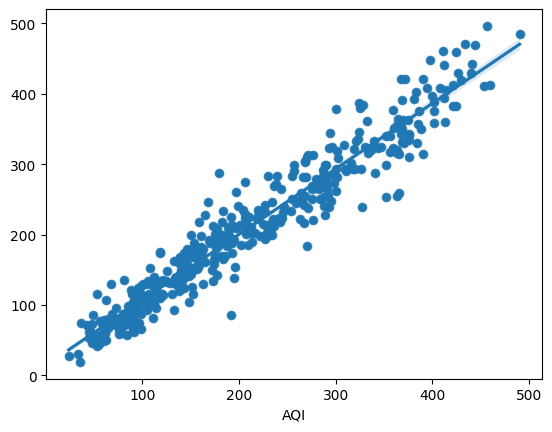

In [42]:
sns.scatterplot(x = y_test, y=y_pred)
sns.regplot(x = y_test, y=y_pred)